## 지도학습 - knn 모델

한글 폰트 설정

In [1]:
import matplotlib
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform

path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")
    
matplotlib.rcParams['axes.unicode_minus'] = False

%matplotlib inline

In [2]:
import mglearn

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

C:\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
C:\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


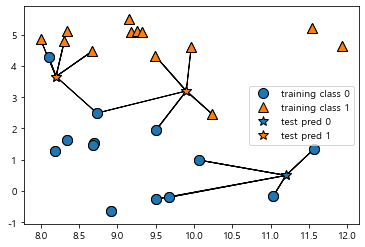

In [5]:
# mglearn.plots.plot_knn_classification(n_neighbors=3)
mglearn.plots.plot_knn_classification(n_neighbors=5)

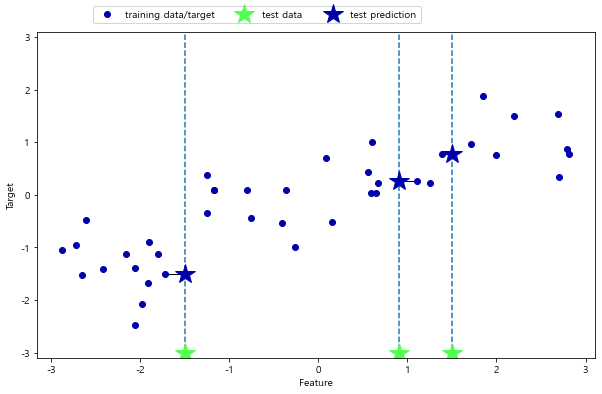

In [6]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [10]:
X, y = mglearn.datasets.make_forge()

X.shape, y.shape

C:\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


((26, 2), (26,))

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

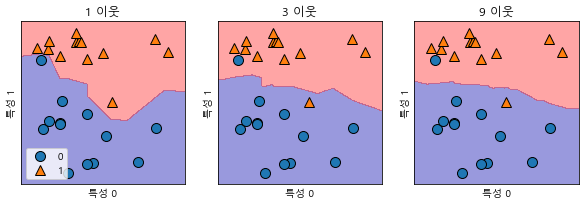

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # fit 메소드는 self 오브젝트를 리턴합니다
    # 그래서 객체 생성과 fit 메소드를 한 줄에 쓸 수 있습니다
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} 이웃".format(n_neighbors))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend(loc=3)

In [12]:
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

In [13]:
cancer = load_breast_cancer()
print(cancer.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [14]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

#특징 특성 feature valuable 변수 column = 특징

In [15]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [16]:
cancer.data.shape

(569, 30)

In [17]:
cancer.target.shape

(569,)

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   stratify=cancer.target,
                                                   random_state=77)

In [20]:
print( len(y_train) )
y_1_all = (y == 1).sum() 
y_0_all =  (y == 0).sum() 

y_train_1 = (y_train == 1).sum()
y_train_0 = len(y_train) - (y_train == 1).sum()

y_test_1 = (y_test == 1).sum()
y_test_0 = len(y_test) - (y_test == 1).sum()

426


In [21]:
print( "y_train y_test => 1의 개수, 1의 개수", y_train_1, y_test_1 )
print( "y_train y_test => 0의 개수, 0의 개수", y_train_0, y_test_0)

## target의 확인
print( "1: y_train:{}, y_test:{}, 비율 {}, {}".format(y_train_1, y_test_1,
                                            y_train_1/y_1_all, y_test_1/y_1_all) )

print( "0 :y_train:{}, y_test:{}, 비율 {}, {}".format(y_train_0, y_test_0,
                                            y_train_0/y_0_all, y_test_0/y_0_all) )

y_train y_test => 1의 개수, 1의 개수 267 90
y_train y_test => 0의 개수, 0의 개수 159 53
1: y_train:267, y_test:90, 비율 0.7478991596638656, 0.25210084033613445
0 :y_train:159, y_test:53, 비율 0.75, 0.25


In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
# pred = model.predict(X_test)

In [29]:
# (pred == y_test).sum() / len(pred)

0.916083916083916

model.score(X_test, y_test) 사용할 경우,
pred = model.predict(X_test)
(pred == y_test).sum() / len(pred)

없이도 구할 수 있음

In [33]:
model.score(X_test, y_test)     #실제 사용한 데이터

0.916083916083916

In [34]:
model.score(X_train, y_train )    #학습시킨 데이터

0.9530516431924883

과대적합: 위와 같이 실제 사용한 데이터의 적중률은 높은데 학습시킨 데이터의 적중률은 낮을 경우/
일반화: 격차가 적을 경우

# for문을 이용해서 k값을 변경하며 정확도 확인해보기